In [1]:
from numpy import pi

import numpy as np
import matplotlib.pyplot as plt

import codevp as vp
from codevp import ray_plane, save_optics

In [2]:
mirror = {
    'shape': 'conic',
    'inter': 'reflection',
    'D': np.array([0.,pi,0.]),
    'P': np.array([0.,0.,10.]),
    'kappa': 0.,
    'c': 0.07,
    'r': 1.8,
}

small_mirror = {
    'shape': 'plane',
    'inter': 'reflection',
    'D': np.array([0.,-pi/4.,0.]),
    'P': np.array([0.,0.,5.]),
    'kappa': 1.,
    'r': 1,
}

selector = {
    'shape': 'plane',
    'inter': 'stop',
    'D': np.array([0., 0., 0.]),
    'P': np.array([0., 0., 0.1]),
    'r': 1.8,
    'r2': 1
}

stop = {
    'shape': 'plane',
    'inter': 'stop',
    'P': np.array([0., -4.6, 5.]),
    'D': np.array([0., pi/2., 0.]),
    'r': .5
}

lensy = -4.
thickness = .25

lens1 = {
    'shape':'conic',
    'inter': 'refraction',
    'P': np.array([0., lensy, 5.]),
    'D':np.array([0., 3*pi/2., 0.]),
    'r': 0.5,
    'kappa':0.,
    'N':1.8,
    'c': 0.3
}

lens2 = {
    'shape':'conic',
    'inter': 'refraction',
    'P': np.array([0., lensy-thickness, 5.]),
    'D':np.array([0., pi/2., 0.]),
    'r': 0.5,
    'kappa':0.,
    'c': 0.3
}

geo = [selector, mirror, small_mirror, lens1, lens2, stop]
ray_group = ray_plane(geo, [0., 0., 0.], 1.8, d=[0.,0.,1.], nrays=50)

In [3]:
rayparams = {'color': 'red',
             'alpha': 0.3}

gplt = vp.geoplot(geo, ray_group, pltparams=rayparams)
oplt = vp.optplot(geo, ray_group)

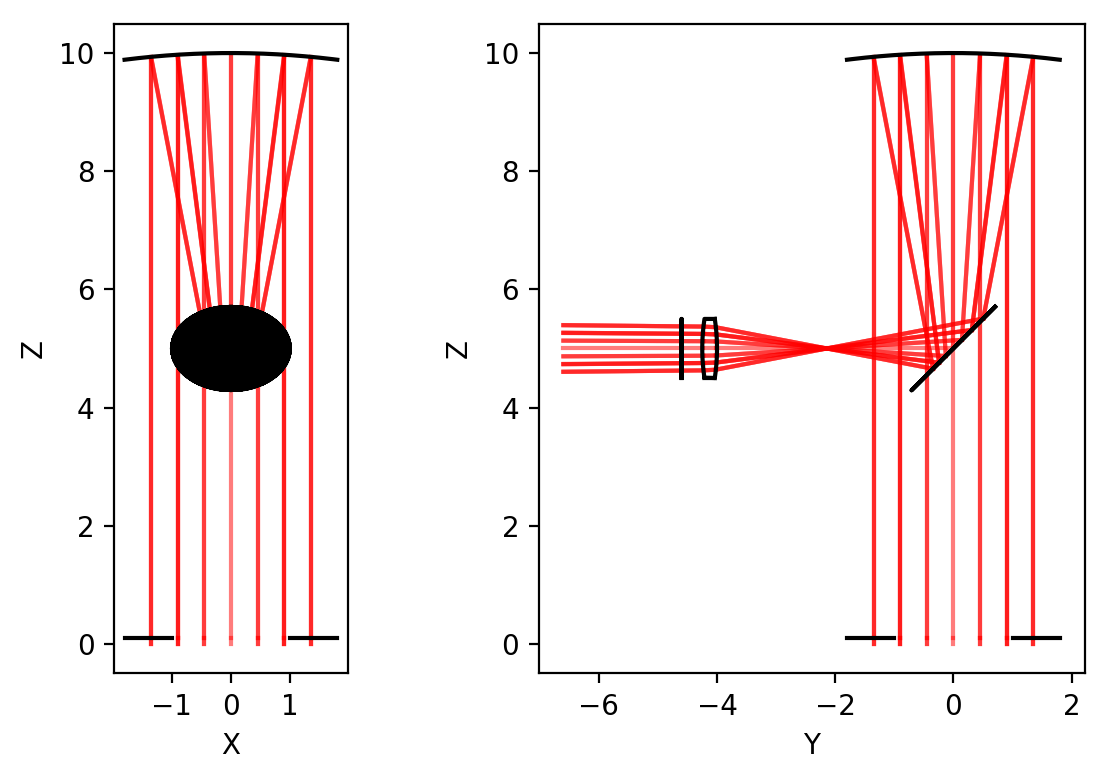

In [4]:
plt.figure(dpi=200)
gplt.plot2d()

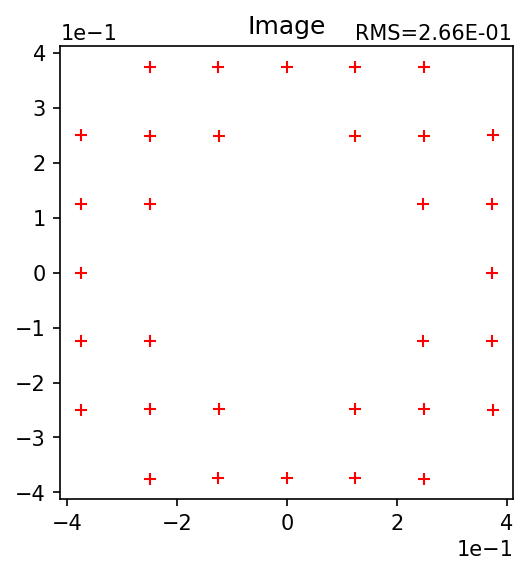

In [5]:
plt.figure(dpi=150)
oplt.spotdiagram()
plt.title("Image")
plt.show()

In [6]:
points = np.array([rayiter.P_hist[0] for rayiter in ray_group])
X, Y = points[:,0], points[:,1]

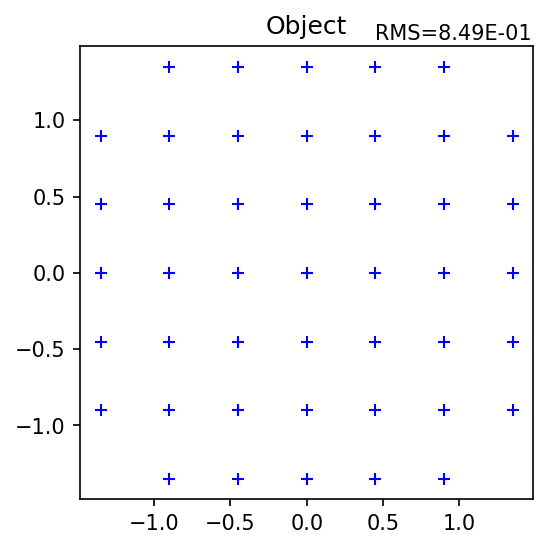

In [7]:
plt.figure(dpi=150)
plt.subplot(1,1,1, aspect='equal')
plt.ticklabel_format(style='sci', axis='both', scilimits=(0,0))
plt.title("Object")
rms = np.std(points[:,[0,1]] - points[:,[0,1]].mean(axis=0))
plt.text(0.65, 1.015, 'RMS=%.2E' % rms, transform=plt.gca().transAxes)
plt.plot(X, Y, '+', color='b')
plt.show()